In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [7]:
df=pd.read_csv('heart.csv')

In [8]:
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


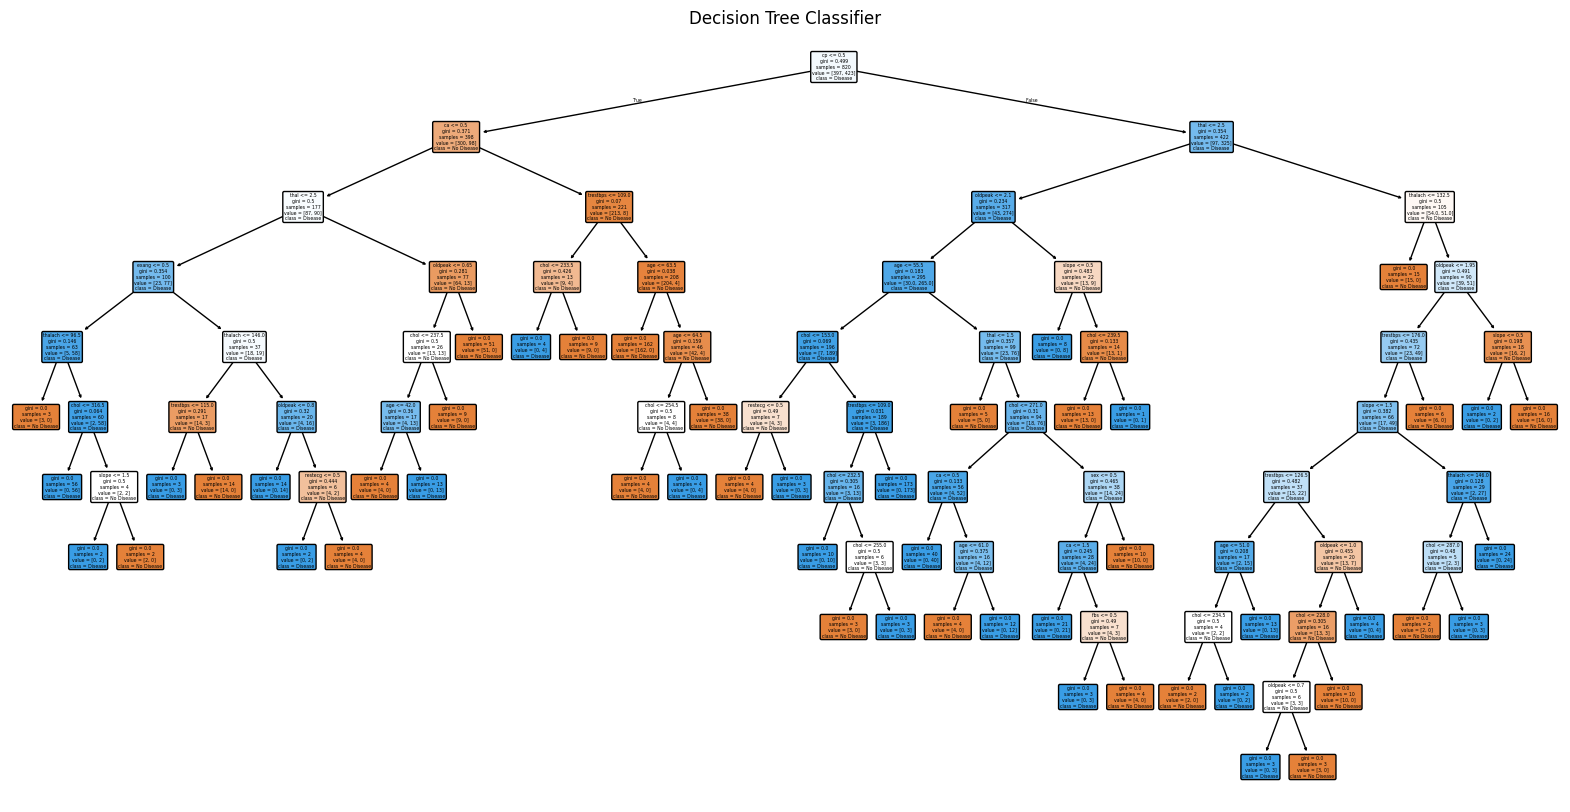

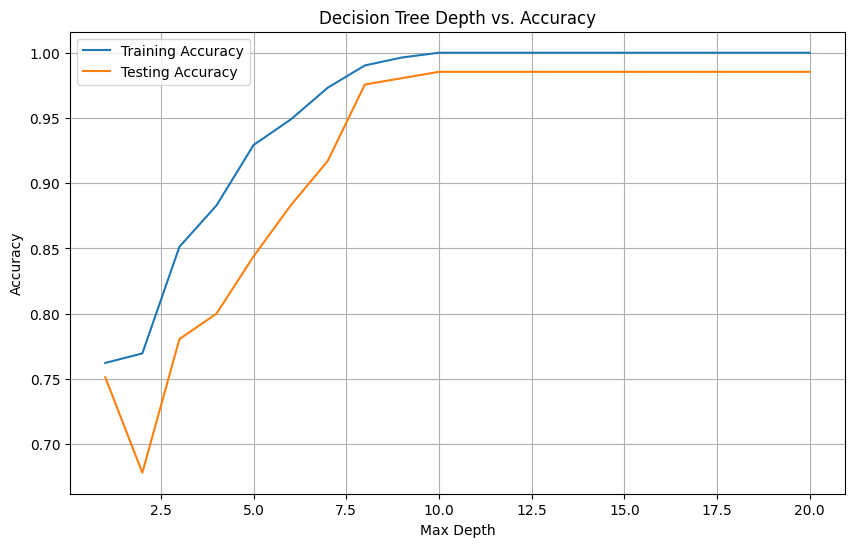

In [9]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

plt.figure(figsize=(20, 10))
plot_tree(dtree, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True)
plt.title('Decision Tree Classifier')
plt.show()

train_acc = []
test_acc = []
depth_range = range(1, 21)

for depth in depth_range:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_acc.append(dt.score(X_train, y_train))
    test_acc.append(dt.score(X_test, y_test))

plt.figure(figsize=(10, 6))
plt.plot(depth_range, train_acc, label='Training Accuracy')
plt.plot(depth_range, test_acc, label='Testing Accuracy')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs. Accuracy')
plt.legend()
plt.grid()
plt.show()


Random Forest Training Accuracy: 1.00
Random Forest Testing Accuracy: 0.99


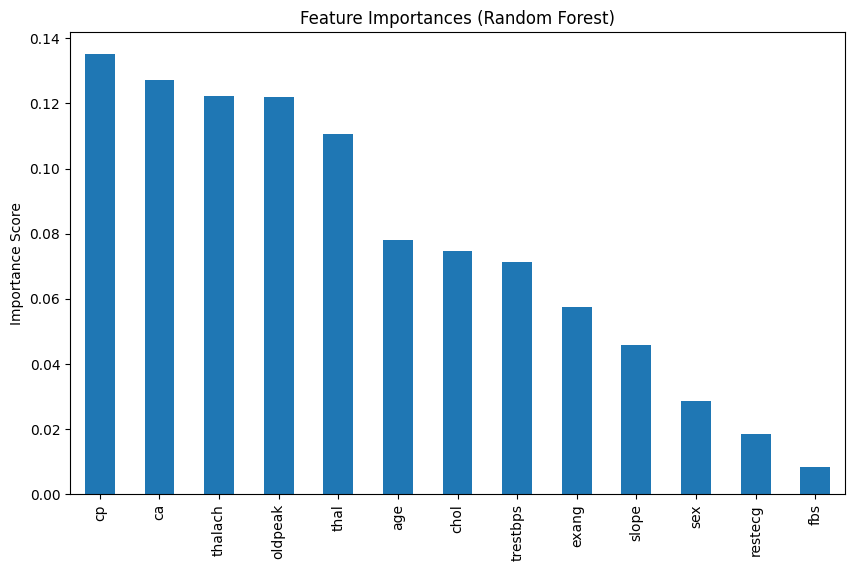

Cross-Validation Scores: [1.         1.         1.         1.         0.98536585]
Mean CV Score: 1.00


In [10]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


rf_train_acc = rf.score(X_train, y_train)
rf_test_acc = rf.score(X_test, y_test)
print(f'Random Forest Training Accuracy: {rf_train_acc:.2f}')
print(f'Random Forest Testing Accuracy: {rf_test_acc:.2f}')


importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
importances.plot(kind='bar')
plt.title('Feature Importances (Random Forest)')
plt.ylabel('Importance Score')
plt.show()

cv_scores = cross_val_score(rf, X, y, cv=5)
print(f'Cross-Validation Scores: {cv_scores}')
print(f'Mean CV Score: {cv_scores.mean():.2f}')
